## Valorant Tweets Sentiment Analysis

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

## Data Manipulation

In [42]:
valo = pd.read_csv("Valorant.csv")
df = valo.copy()

In [43]:
df.head()

,Unnamed: 0,Date,Id,Text,Length,Likes,Retweets,Sentiment,Source
0,0,2020-03-02 07:57:11,1234387260516306944,Sommer 2020\n2020 여름\nЛето 2020 https://t.co/A...,53,89679,19958,0,playVALORANT
1,1,2020-03-02 08:01:01,1234388225696948226,Summer 2020\nÉté 2020\nVerano de 2020\n\nhttps...,84,36545,7276,0,playVALORANT
2,2,2020-03-02 20:40:31,1234579361929428993,Thank you to everyone who has expressed intere...,139,31719,1312,0,playVALORANT
3,3,2020-03-02 20:43:24,1234580087887892480,RT @famitsu: 『LoL』のライアットによる新作FPS『VALORANT』（ヴァロ...,140,0,4055,1,playVALORANT
4,4,2020-03-02 20:45:25,1234580595126108160,"RT @Polygon: For the past six years, Riot Game...",140,0,424,-1,playVALORANT


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  362 non-null    int64 
 1   Date        362 non-null    object
 2   Id          362 non-null    int64 
 3   Text        362 non-null    object
 4   Length      362 non-null    int64 
 5   Likes       362 non-null    int64 
 6   Retweets    362 non-null    int64 
 7   Sentiment   362 non-null    int64 
 8   Source      362 non-null    object
dtypes: int64(6), object(3)
memory usage: 25.6+ KB


In [45]:
df.shape

(362, 9)

In [80]:
NAN = [(c, df[c].isna().mean()*100) for c in df]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
0,Text,0.0
1,Length,0.0
2,Likes,0.0
3,Retweets,0.0
4,month,0.0
5,year,0.0


In [46]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df.drop("Id", axis=1, inplace=True)
df.drop("Sentiment", axis=1, inplace=True)
df.drop("Source", axis=1, inplace=True)

In [163]:
df.corr()

,Length,Likes,Retweets,month,year,frequency
Length,1.000000,0.006379,-0.066774,0.079519,NaN,0.898154
Likes,0.006379,1.000000,0.795262,-0.289316,NaN,-0.021405
Retweets,-0.066774,0.795262,1.000000,-0.309720,NaN,-0.078214
month,0.079519,-0.289316,-0.309720,1.000000,NaN,0.100074
year,NaN,NaN,NaN,NaN,NaN,NaN
frequency,0.898154,-0.021405,-0.078214,0.100074,NaN,1.000000


In [47]:
df.Date=df.Date.apply(pd.to_datetime)

In [48]:
df["month"]=df.Date.dt.month
df["year"]=df.Date.dt.year

In [50]:
df.drop("Date", axis=1, inplace=True)

In [51]:
df.head()

,Text,Length,Likes,Retweets,month,year
0,Sommer 2020\n2020 여름\nЛето 2020 https://t.co/A...,53,89679,19958,3,2020
1,Summer 2020\nÉté 2020\nVerano de 2020\n\nhttps...,84,36545,7276,3,2020
2,Thank you to everyone who has expressed intere...,139,31719,1312,3,2020
3,RT @famitsu: 『LoL』のライアットによる新作FPS『VALORANT』（ヴァロ...,140,0,4055,3,2020
4,"RT @Polygon: For the past six years, Riot Game...",140,0,424,3,2020


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,362.0,108.563536,34.959139,10.0,84.0,120.5,140.0,144.0
Likes,362.0,2912.381215,9214.872443,0.0,8.5,181.5,872.0,89679.0
Retweets,362.0,460.464088,1568.460150,0.0,12.0,41.5,189.5,19958.0
month,362.0,3.906077,0.292125,3.0,4.0,4.0,4.0,4.0
year,362.0,2020.000000,0.000000,2020.0,2020.0,2020.0,2020.0,2020.0


In [69]:
df.groupby("Likes").max()

,Text,Length,Retweets,month,year
Likes,,,,,
0,rt wandakunpls first quick drawing jett playva...,144,9203,4,2020
2,prebengutt open beta announced right,54,0,4,2020
6,smage,15,0,4,2020
8,maniac_csgo heres everything need know sova ab...,116,1,4,2020
10,maniac_csgo heres everything need know brimsto...,121,2,4,2020
...,...,...,...,...,...
41680,jett korea keep valorant httpstcofcgfugnkr,59,7200,4,2020
42644,one week couple notes get weekend drops runnin...,140,3336,4,2020
52457,phoenix united kingdom already know name valor...,88,8066,3,2020


## Text Preprocessing

In [53]:
!pip install textblob
!pip install nltk 

In [54]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [56]:
#lowercase 
df["Text"] = df["Text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [59]:
#numerical values
df["Text"] = df["Text"].str.replace("\d","")

In [60]:
#punctation
df["Text"] = df["Text"].str.replace("[^\w\s]","")

In [62]:
#stopwords
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["Text"] = df["Text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
#lemmatization 
from textblob import Word
nltk.download("wordnet")
df["Text"] = df["Text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [85]:
#word tokenization
from nltk.tokenize import word_tokenize
df["tokens"] = df["Text"].apply(lambda x: TextBlob(x).words)

In [93]:
df["frequency"] = df["Text"].apply(lambda x: len(str(x).split(" "))) 

In [241]:
df.groupby("frequency").max()
df[df["Text"].str.contains("muitz")]
longest_comment=df.iloc[74,0]
print(longest_comment)

rt muitz nuevo vídeo primeras impresiones valorant espero que os guste que os saque de dudas de lo que podéis encontrar en bre


In [242]:
TextBlob(longest_comment).tags

[('rt', 'NN'),
 ('muitz', 'NN'),
 ('nuevo', 'JJ'),
 ('vídeo', 'NN'),
 ('primeras', 'NNS'),
 ('impresiones', 'NNS'),
 ('valorant', 'JJ'),
 ('espero', 'NN'),
 ('que', 'NN'),
 ('os', 'JJ'),
 ('guste', 'NN'),
 ('que', 'NN'),
 ('os', 'JJ'),
 ('saque', 'NN'),
 ('de', 'IN'),
 ('dudas', 'FW'),
 ('de', 'FW'),
 ('lo', 'FW'),
 ('que', 'NN'),
 ('podéis', 'NN'),
 ('encontrar', 'NN'),
 ('en', 'IN'),
 ('bre', 'NN')]

In [103]:
df.groupby("Likes").max()
text = " ".join(i for i in df.Text)
df[df["Text"].str.contains("sommer")]
longest_comment=df.iloc[0,0]
print(longest_comment)

sommer 여름 лето httpstcoabncpghfv


In [104]:
df.head()

,Text,Length,Likes,Retweets,month,year,tokens,frequency
0,sommer 여름 лето httpstcoabncpghfv,53,89679,19958,3,2020,"[sommer, 여름, лето, httpstcoabncpghfv]",4
1,summer été verano de httpstcocuwzpbkl httpstco...,84,36545,7276,3,2020,"[summer, été, verano, de, httpstcocuwzpbkl, ht...",6
2,thank everyone expressed interest valorant eve...,139,31719,1312,3,2020,"[thank, everyone, expressed, interest, valoran...",12
3,rt famitsu lolのライアットによる新作fpsvalorantヴァロラントが正式発...,140,0,4055,3,2020,"[rt, famitsu, lolのライアットによる新作fpsvalorantヴァロラントが...",7
4,rt polygon past six years riot games incubatin...,140,0,424,3,2020,"[rt, polygon, past, six, years, riot, games, i...",14


## Data Visualization - WordCloud 

In [78]:
!pip install wordcloud

from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [79]:
# we need convert all reviews to single text 

text = " ".join(i for i in df.Text)

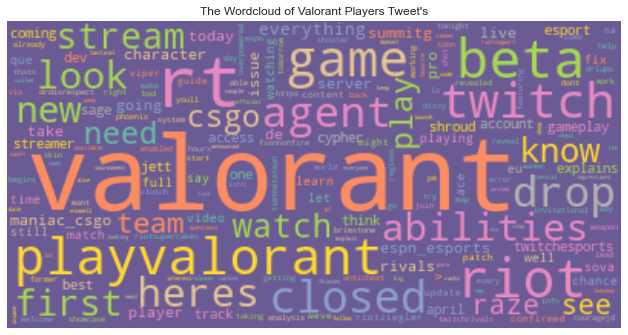

In [172]:
wordcloud = WordCloud(
    background_color="#6B5B95",
    colormap="Set2",
    collocations=False).generate(text)

plt.figure(figsize=[11,11])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The Wordcloud of Valorant Players Tweet's")
plt.show()

In [204]:
print("\n",
      text.count("valorant"),
      "\n",text.count("rt"),
      "\n",text.count("play"),
      "\n",text.count("riot"),
      "\n",text.count("game"),
      "\n",text.count("beta"),
      "\n",text.count("csgo"),
      "\n",text.count("watch"),
      "\n",text.count("closed"),
      "\n",text.count("agent"),
     )


 262 
 167 
 94 
 67 
 60 
 43 
 32 
 28 
 27 
 27


In [205]:
data = {
    "title": ["valorant", "rt" ,"play", "riot", "game", "beta", 
              "csgo","watch","closed", "agent"],
    "count": [262, 167 ,94, 67, 60, 43,32, 28, 27, 27],
}

In [206]:
data = pd.DataFrame(data)
data.head(10)

,title,count
0,valorant,262
1,rt,167
2,play,94
3,riot,67
4,game,60
5,beta,43
6,csgo,32
7,watch,28
8,closed,27
9,agent,27


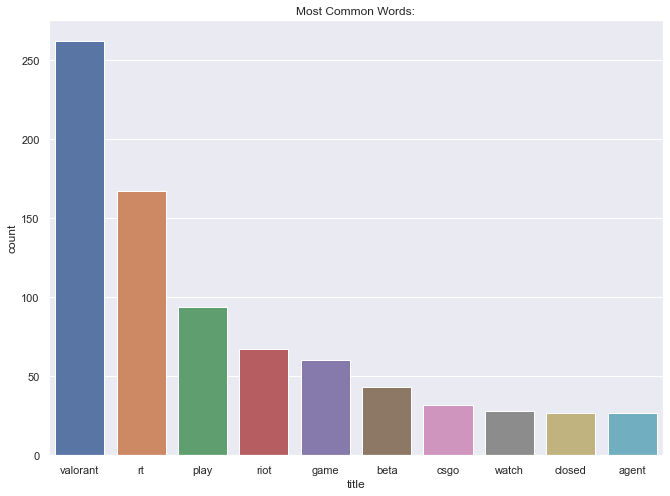

In [207]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=data, x="title", y="count").set(title="Most Common Words:");

In [ ]:
#by month

In [117]:
df.groupby("month").count()

,Text,Length,Likes,Retweets,year,tokens,frequency
month,,,,,,,
3,34,34,34,34,34,34,34
4,328,328,328,328,328,328,328


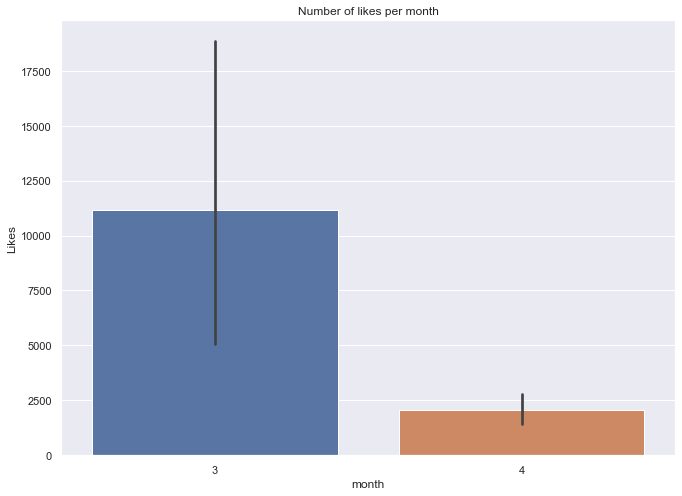

In [247]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,8)})
sns.barplot(data=df, x="month", y="Likes").set(title="Number of likes per month");

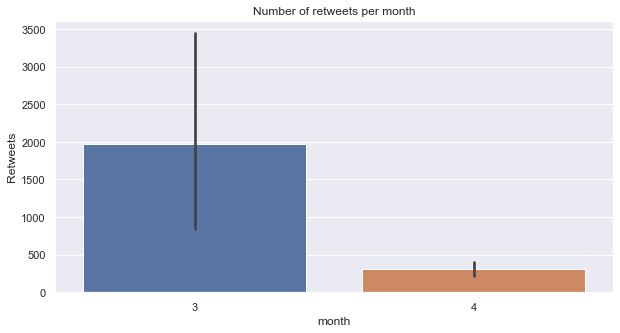

In [249]:
#sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(10,5)})
sns.barplot(data=df, x="month", y="Retweets").set(title="Number of retweets per month");

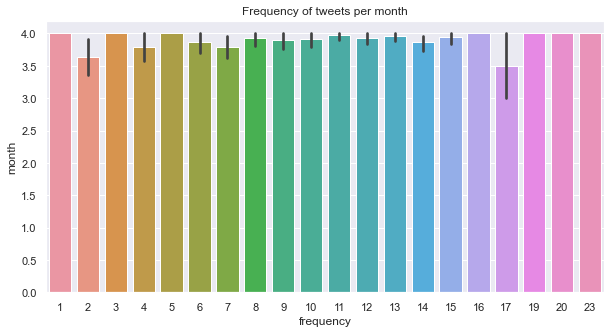

In [219]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6})
sns.set(rc = {'figure.figsize':(11,5)})
sns.barplot(data=df, x="frequency", y="month").set(title="Frequency of tweets per month");

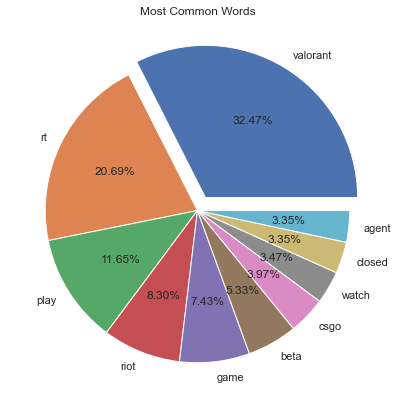

In [250]:
fig = plt.figure(figsize =(10, 7))
myexplode = [0.1, 0, 0, 0,0,0,0,0,0,0] 
plt.pie(data["count"], labels = data["title"], autopct='%1.2f%%', explode=myexplode)
plt.title("Most Common Words")

plt.show()

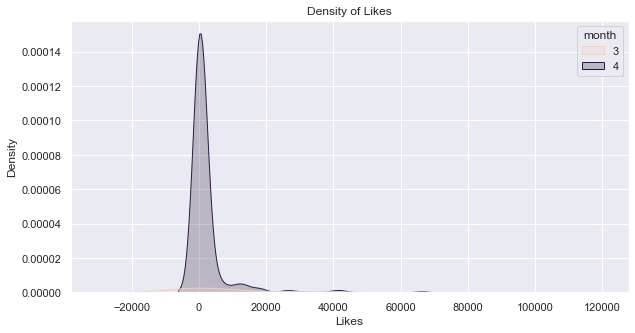

In [251]:
sns.kdeplot(x=df.Likes, shade=True, hue=df.month).set(title="Density of Likes"); # dağılım grafiği

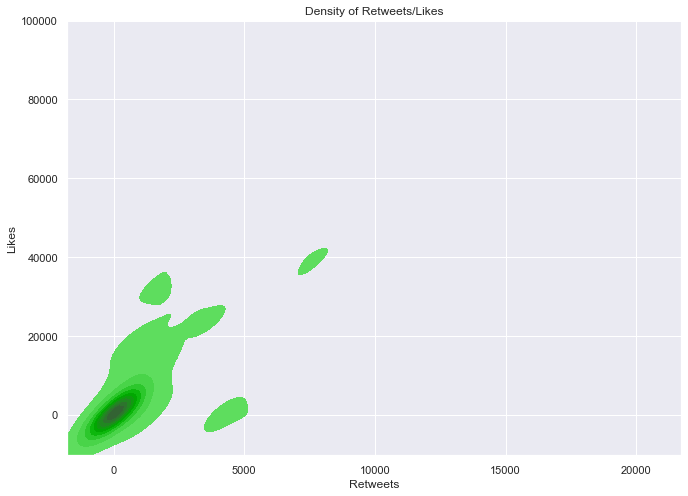

In [147]:
sns.kdeplot(x=df.Retweets, y=df.Likes,shade=True, color="green").set(title="Density of Retweets/Likes"); # dağılım grafiği

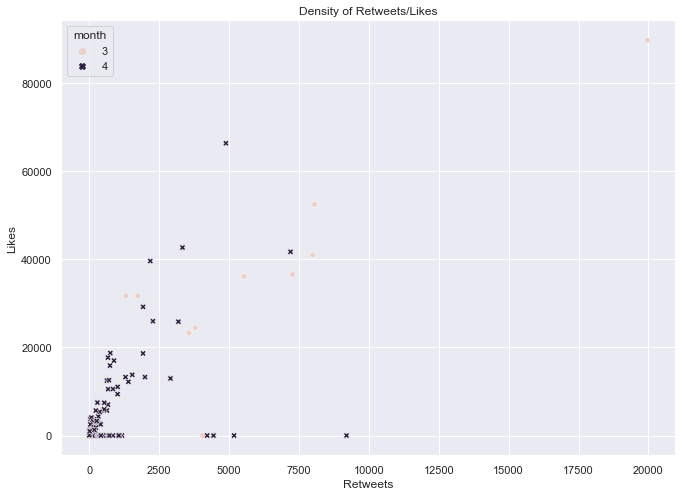

In [157]:
sns.scatterplot(data=df, x="Retweets", y="Likes", hue="month", style="month").set(title="Density of Retweets/Likes");

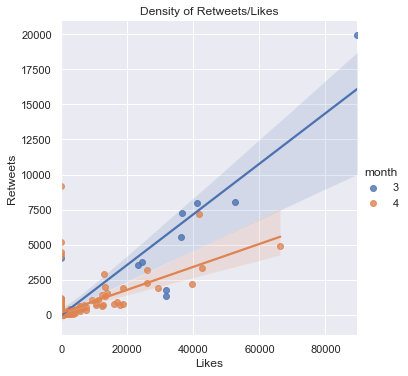

In [160]:
sns.lmplot(data=df, x="Likes", y="Retweets", hue="month").set(title="Density of Retweets/Likes");

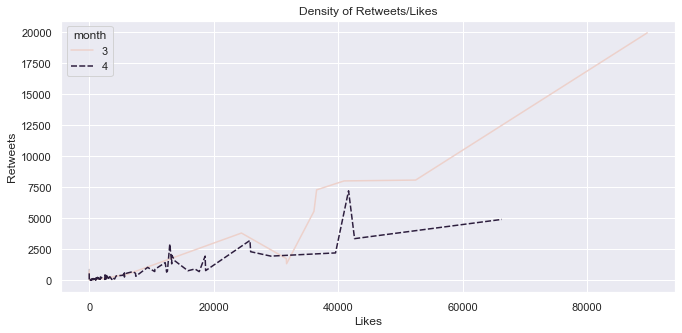

In [221]:
sns.lineplot(data=df, x="Likes", y="Retweets", hue="month", style="month").set(title="Density of Retweets/Likes");

### Sentiment Analysis

In [227]:
!pip install vaderSentiment

import re
import os
import sys
import ast

In [228]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

In [229]:
emptylist = []

for i in df["Text"]:
    vs = analyzer.polarity_scores(i)
    emptylist.append(vs)

In [230]:
df2 = pd.DataFrame(emptylist)
df2.head()

,neg,neu,pos,compound
0,0.000,1.000,0.000,0.0000
1,0.000,1.000,0.000,0.0000
2,0.000,0.645,0.355,0.6705
3,0.000,1.000,0.000,0.0000
4,0.217,0.783,0.000,-0.5574


In [231]:
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,Text,Length,Likes,Retweets,month,year,tokens,frequency,neg,neu,pos,compound
0,sommer 여름 лето httpstcoabncpghfv,53,89679,19958,3,2020,"[sommer, 여름, лето, httpstcoabncpghfv]",4,0.000,1.000,0.000,0.0000
1,summer été verano de httpstcocuwzpbkl httpstco...,84,36545,7276,3,2020,"[summer, été, verano, de, httpstcocuwzpbkl, ht...",6,0.000,1.000,0.000,0.0000
2,thank everyone expressed interest valorant eve...,139,31719,1312,3,2020,"[thank, everyone, expressed, interest, valoran...",12,0.000,0.645,0.355,0.6705
3,rt famitsu lolのライアットによる新作fpsvalorantヴァロラントが正式発...,140,0,4055,3,2020,"[rt, famitsu, lolのライアットによる新作fpsvalorantヴァロラントが...",7,0.000,1.000,0.000,0.0000
4,rt polygon past six years riot games incubatin...,140,0,424,3,2020,"[rt, polygon, past, six, years, riot, games, i...",14,0.217,0.783,0.000,-0.5574


In [232]:
df3["sentiment"] = np.where(df3["compound"] >= 0, "positive", "negative")

In [233]:
df3.head()

,Text,Length,Likes,Retweets,month,year,tokens,frequency,neg,neu,pos,compound,sentiment
0,sommer 여름 лето httpstcoabncpghfv,53,89679,19958,3,2020,"[sommer, 여름, лето, httpstcoabncpghfv]",4,0.000,1.000,0.000,0.0000,positive
1,summer été verano de httpstcocuwzpbkl httpstco...,84,36545,7276,3,2020,"[summer, été, verano, de, httpstcocuwzpbkl, ht...",6,0.000,1.000,0.000,0.0000,positive
2,thank everyone expressed interest valorant eve...,139,31719,1312,3,2020,"[thank, everyone, expressed, interest, valoran...",12,0.000,0.645,0.355,0.6705,positive
3,rt famitsu lolのライアットによる新作fpsvalorantヴァロラントが正式発...,140,0,4055,3,2020,"[rt, famitsu, lolのライアットによる新作fpsvalorantヴァロラントが...",7,0.000,1.000,0.000,0.0000,positive
4,rt polygon past six years riot games incubatin...,140,0,424,3,2020,"[rt, polygon, past, six, years, riot, games, i...",14,0.217,0.783,0.000,-0.5574,negative


## Result

In [234]:
result = df3["sentiment"].value_counts()

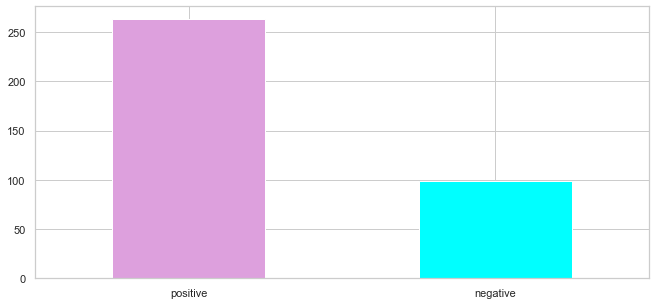

In [235]:
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [237]:
df3.groupby("sentiment").count()

,Text,Length,Likes,Retweets,month,year,tokens,frequency,neg,neu,pos,compound
sentiment,,,,,,,,,,,,
negative,99,99,99,99,99,99,99,99,99,99,99,99
positive,263,263,263,263,263,263,263,263,263,263,263,263


In [238]:
df3.groupby("pos").max()

,Text,Length,Likes,Retweets,month,year,tokens,frequency,neg,neu,compound,sentiment
pos,,,,,,,,,,,,
0.000,xqc explains valorants graphics actually big u...,144,89679,19958,4,2020,"[xqc, explains, valorants, graphics, actually,...",23,0.752,1.000,0.0000,positive
0.095,seeing issue number logins specific service th...,139,18709,753,4,2020,"[seeing, issue, number, logins, specific, serv...",12,0.175,0.730,-0.2732,negative
0.102,mixwell mixwell reached riot unlock account an...,117,236,12,4,2020,"[mixwell, mixwell, reached, riot, unlock, acco...",9,0.460,0.438,-0.7096,negative
0.106,eu valorant servers issues game starts charact...,139,5662,234,4,2020,"[eu, valorant, servers, issues, game, starts, ...",12,0.000,0.894,0.0772,positive
0.109,riot confirmed twitch streamer playing valoran...,140,13772,1539,4,2020,"[riot, confirmed, twitch, streamer, playing, v...",12,0.345,0.545,-0.5994,negative
...,...,...,...,...,...,...,...,...,...,...,...,...
0.619,great clutch play timthetatman valorant httpst...,75,292,25,4,2020,"[great, clutch, play, timthetatman, valorant, ...",6,0.000,0.381,0.7579,positive
0.640,onehandfps yes able rebind abilities whatever ...,81,176,5,4,2020,"[onehandfps, yes, able, rebind, abilities, wha...",8,0.000,0.360,0.8360,positive
0.688,onehandfps yep,16,23,1,4,2020,"[onehandfps, yep]",2,0.000,0.312,0.2960,positive


In [256]:
df[df["Text"].str.contains("uclasunny")]

,Text,Length,Likes,Retweets,month,year,tokens,frequency
79,uclasunny welcome party,32,33,0,4,2020,"[uclasunny, welcome, party]",3


In [261]:
TextBlob(df.iloc[79,0]).tags

[('uclasunny', 'JJ'), ('welcome', 'NN'), ('party', 'NN')]

In [239]:
df3.groupby("neg").max()

,Text,Length,Likes,Retweets,month,year,tokens,frequency,neu,pos,compound,sentiment
neg,,,,,,,,,,,,
0.000,youre avengers credit uloserwithacomputer http...,144,89679,19958,4,2020,"[youre, avengers, credit, uloserwithacomputer,...",23,1.000,0.851,0.8625,positive
0.083,looks like cyphers spycam huge exploit valoran...,117,1075,104,4,2020,"[looks, like, cyphers, spycam, huge, exploit, ...",12,0.476,0.440,0.7184,positive
0.093,details gamebreaking exploit cyphers spycam th...,133,53,2,4,2020,"[details, gamebreaking, exploit, cyphers, spyc...",11,0.464,0.444,0.6486,positive
0.098,rt dhalucard valorant trick shots da seh ich m...,94,0,59,4,2020,"[rt, dhalucard, valorant, trick, shots, da, se...",12,0.902,0.000,-0.0516,negative
0.113,new valorant hotfix confirmed cypher spycam ex...,130,324,33,4,2020,"[new, valorant, hotfix, confirmed, cypher, spy...",12,0.887,0.000,-0.1027,negative
...,...,...,...,...,...,...,...,...,...,...,...,...
0.533,bunnyhop valorant avoid enemy abilities httpst...,80,255,31,4,2020,"[bunnyhop, valorant, avoid, enemy, abilities, ...",6,0.280,0.187,-0.5719,negative
0.573,worlds worst valorant knife fight awakerdegree...,79,241,23,4,2020,"[worlds, worst, valorant, knife, fight, awaker...",7,0.427,0.000,-0.7717,negative
0.623,track panic stefandré,30,977,17,4,2020,"[track, panic, stefandré]",3,0.377,0.000,-0.5106,negative


In [255]:
df[df["Text"].str.contains("battle stop")]

,Text,Length,Likes,Retweets,month,year,tokens,frequency
313,battle stop cheaters riot games offering expos...,140,1132,179,4,2020,"[battle, stop, cheaters, riot, games, offering...",11


In [260]:
TextBlob(df.iloc[313,0]).tags

[('battle', 'NN'),
 ('stop', 'NN'),
 ('cheaters', 'NNS'),
 ('riot', 'VBP'),
 ('games', 'NNS'),
 ('offering', 'VBG'),
 ('expose', 'JJ'),
 ('flaws', 'NNS'),
 ('valorant', 'JJ'),
 ('anti', 'NNS'),
 ('httpstconffdksz', 'NN')]